In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<a href="https://colab.research.google.com/drive/1ce3ZNia6euE6C4WILJ4jYadzrFRPTOUm?usp=sharing">Link To Colab</a>

In [6]:
!pip install catboost

In [7]:
data = pd.read_csv('/content/adaptibility.csv')

In [8]:
data.sample(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
127,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Mobile,Moderate
75,Girl,6-10,School,Non Government,No,Yes,Low,Mid,Mobile Data,2G,1-3,No,Mobile,Low
191,Boy,21-25,University,Non Government,Yes,Yes,High,Mid,Mobile Data,3G,3-6,Yes,Mobile,Moderate
634,Girl,21-25,University,Government,No,Yes,Low,Mid,Wifi,3G,0,Yes,Mobile,Low
703,Girl,1-5,School,Government,No,Yes,Low,Rich,Mobile Data,4G,1-3,Yes,Mobile,Low
242,Girl,11-15,School,Government,No,Yes,Low,Rich,Wifi,4G,1-3,No,Mobile,Moderate
977,Boy,6-10,School,Government,No,Yes,Low,Mid,Mobile Data,4G,0,No,Mobile,Low
660,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
1157,Boy,26-30,University,Government,Yes,Yes,Low,Rich,Wifi,4G,1-3,No,Computer,High
32,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [10]:
data.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


<div>
    <p> No Null values present in the dataset
</div>

# Exploratory Data Analysis

### Distribution of Features

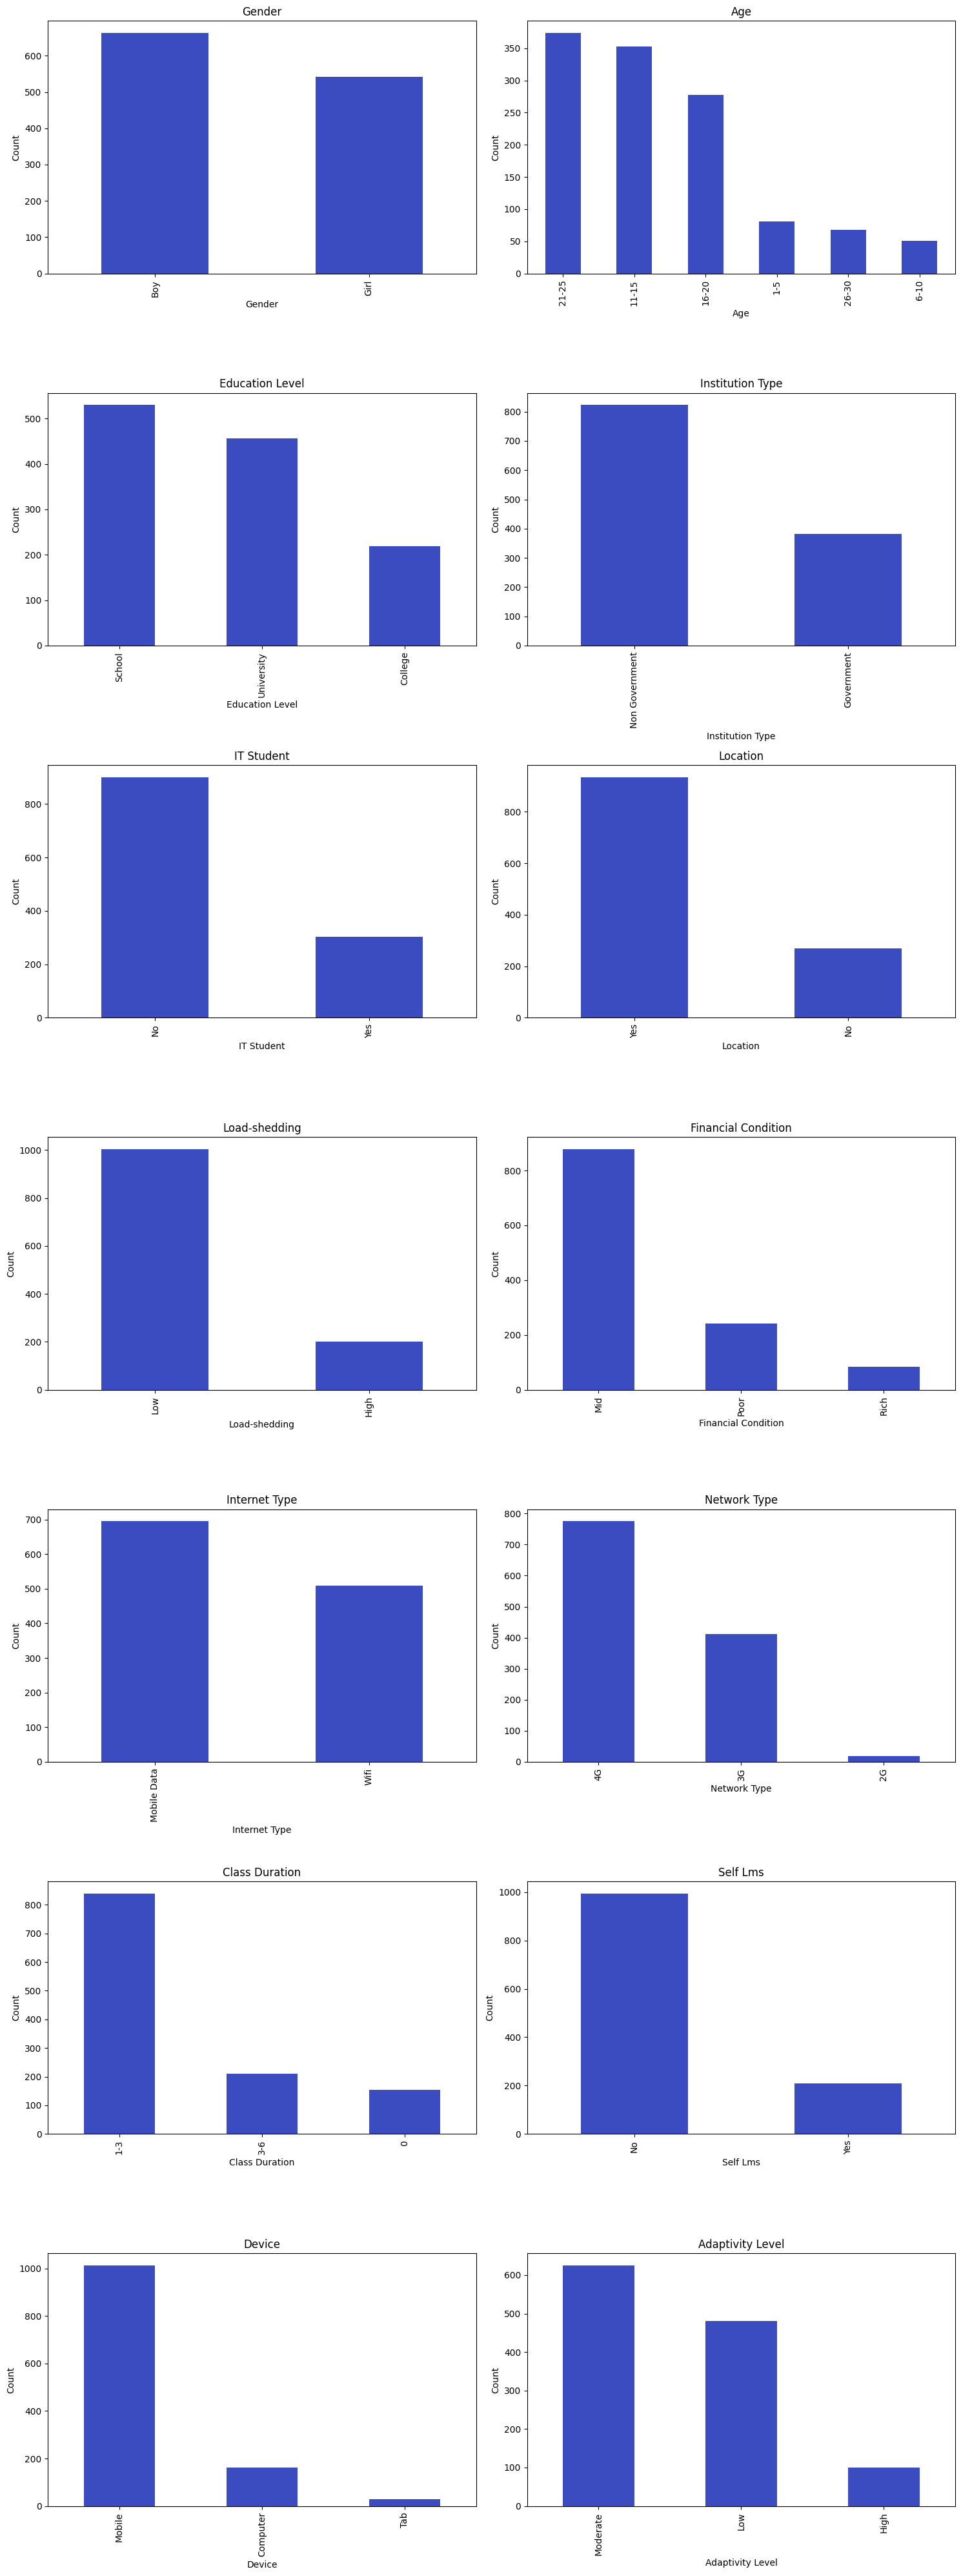

In [11]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 40))
axes = axes.flatten()

features = data.columns.to_list()
for i, feature in enumerate(features):
    df = data[feature].value_counts()
    df.plot(kind='bar', colormap='coolwarm', ax=axes[i])

    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Features Values Count with respect to Adaptivity Level

In [12]:
features = data.columns.to_list()

In [13]:
features.remove('Adaptivity Level')
features

['Gender',
 'Age',
 'Education Level',
 'Institution Type',
 'IT Student',
 'Location',
 'Load-shedding',
 'Financial Condition',
 'Internet Type',
 'Network Type',
 'Class Duration',
 'Self Lms',
 'Device']

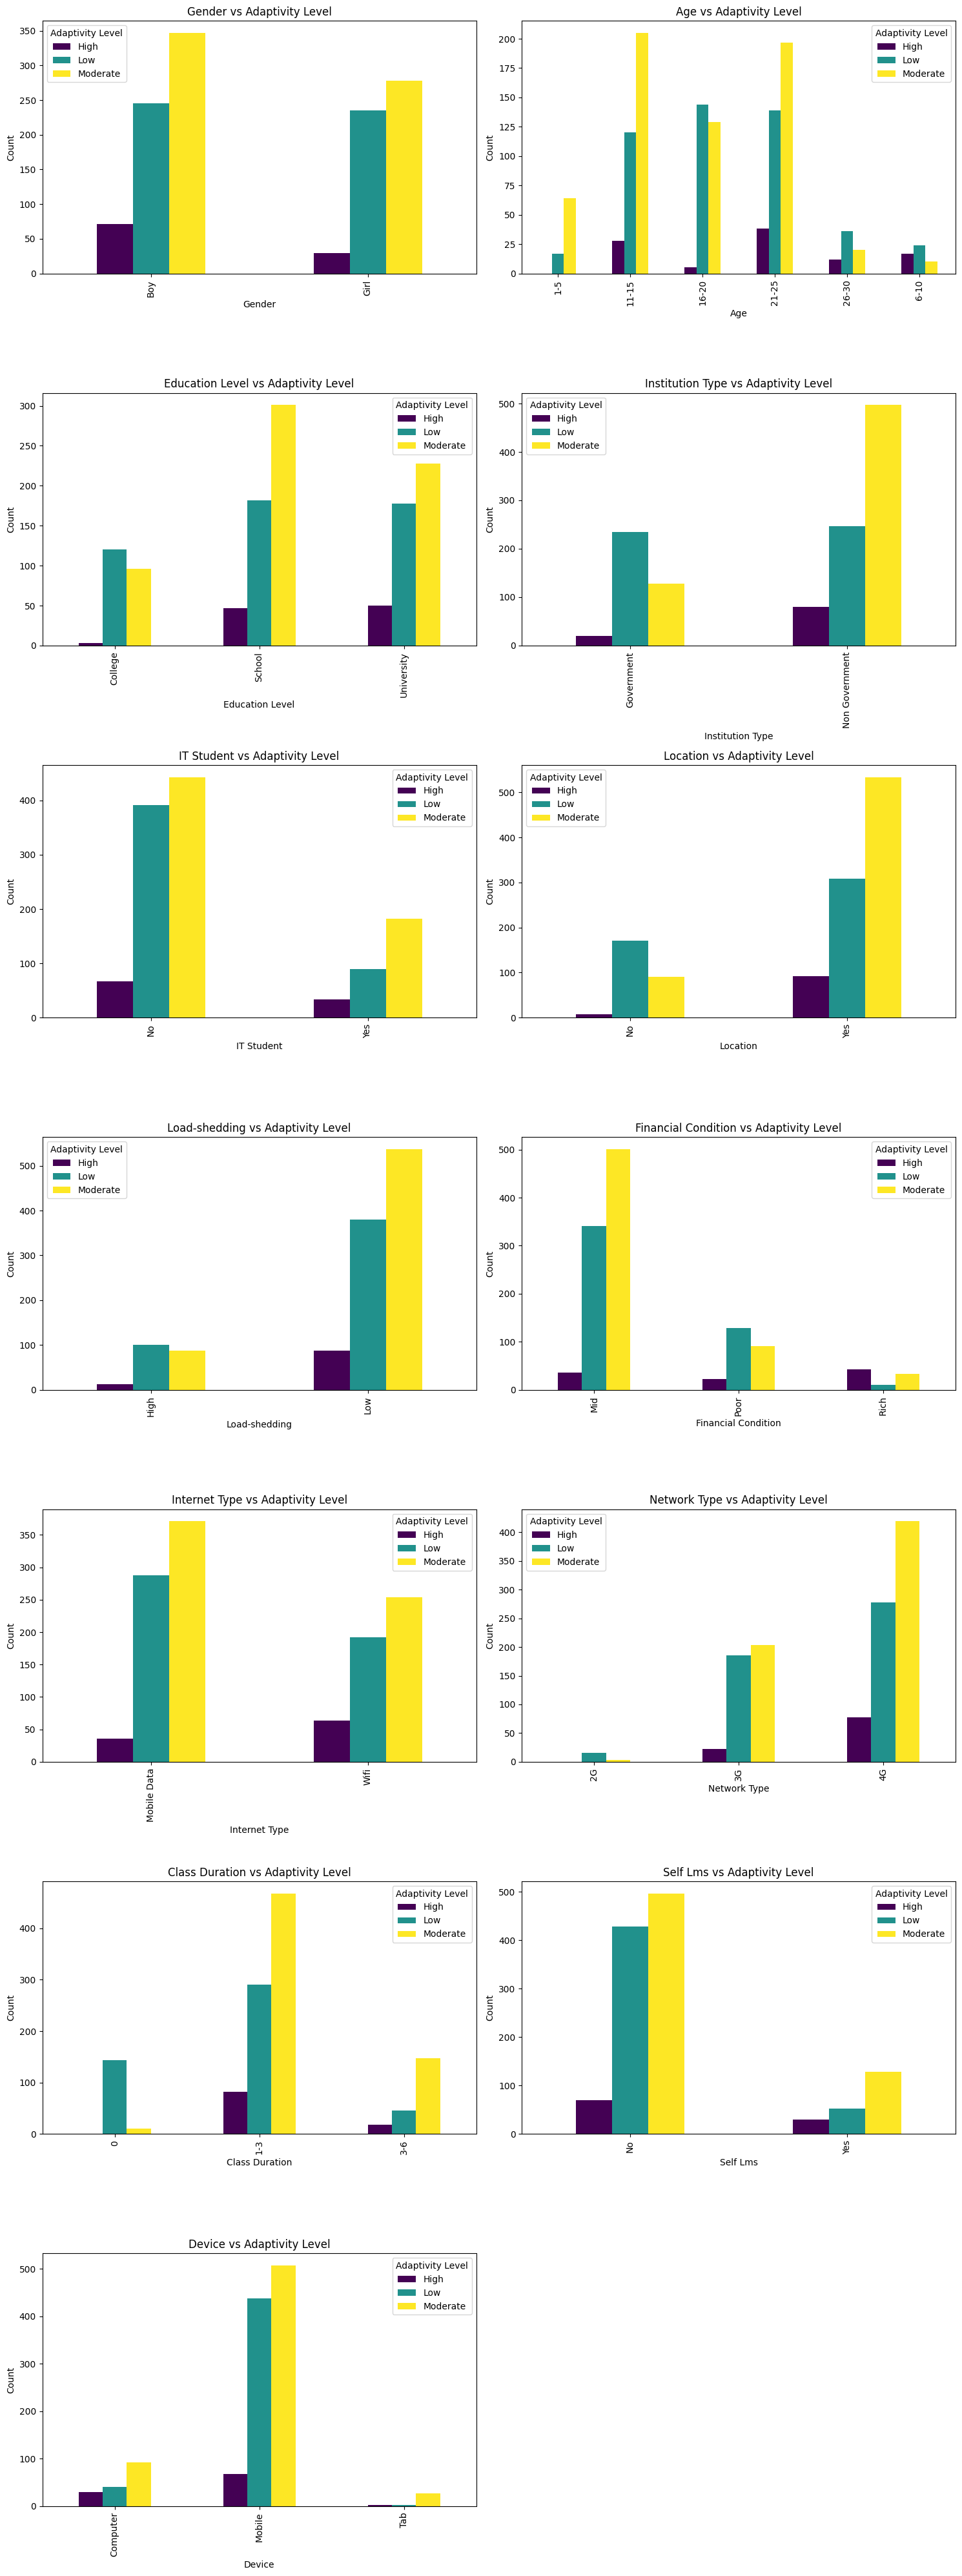

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 40))
axes = axes.flatten()

for i, feature in enumerate(features):

    df = data[[feature, 'Adaptivity Level']]
    df_count = df.groupby([feature, 'Adaptivity Level']).size().unstack()

    df_count.plot(kind='bar', ax=axes[i], colormap='viridis')

    axes[i].set_title(f'{feature} vs Adaptivity Level')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

### Results after analysis

<div>
    <ol>
        <li>Boys and girls have almost the same adaptivity levels</li>
        <li>Age groups from 11-25 collectively have more better adaptation levels
        <li>School students are good at online education
        <li>Non Government Organisations gives better online education
        <li>Non IT students are well above in online education
        <li>Student located in same town as institution are good at online education
        <li>As expected, low load shedding increases the online education adaptiveness
        <li>Students from poor or rich financial homes don't have better adaptivity level
        <li>Both Mobile Data and Wifi have good levels of adaptiveness
        <li>Students with 4G network are easily adapting
    </ol>
</div>

## Percentage of records sharing

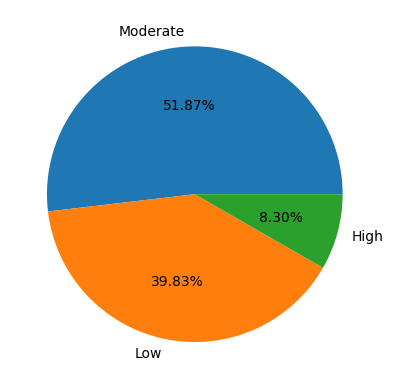

In [15]:
plt.pie(data['Adaptivity Level'].value_counts(), labels=data['Adaptivity Level'].unique(), autopct="%1.2f%%")
plt.show()

## Pre-Processing

### Encoding categorical values

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [17]:
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1


# Model Development

##### train test split and scaling and using SMOTE balancing technique

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = data.drop('Adaptivity Level', axis=1, inplace=False)
y = data['Adaptivity Level']

smote = SMOTE()
scaler = StandardScaler()

X, y = smote.fit_resample(data.drop(["Adaptivity Level"],axis=1),data["Adaptivity Level"])

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Iteration 1

In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score

## Define the models

In [21]:
rfc = RandomForestClassifier()
dc = DecisionTreeClassifier()
xgb = XGBClassifier()
adb = AdaBoostClassifier()

catb = CatBoostClassifier(verbose=False)

### Use loops to iterate thorugh all models and train them

In [22]:
models = [rfc, dc, xgb, adb, catb]

In [23]:
model_result = []

In [24]:
for model in models:
    model.fit(X_train, y_train)

### Find the metrics

In [25]:
model_list = ['RandomForest', 'DecisionTree', 'XGBoostClassifier', 'AdaBoostClasssifier', 'CatBoostClassifier']

In [26]:
for model, name in zip(models, model_list):
    id = name
    y_pred = model.predict(X_test)

    balance_accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred, average='weighted')

    print(id)
    print("balance_accuracy :", balance_accuracy)
    print("accuracy :", accuracy)
    print("f1_score :", F1_score)
    print("***********************************************")

    model_result.append({
        "Name": id,
        "Balance Accuracy": balance_accuracy,
        "Accuracy": accuracy,
        "F1 Score": F1_score
    })


RandomForest
balance_accuracy : 0.919761273209549
accuracy : 0.9226666666666666
f1_score : 0.921520253266302
***********************************************
DecisionTree
balance_accuracy : 0.9226348364279399
accuracy : 0.9253333333333333
f1_score : 0.9243386686469662
***********************************************
XGBoostClassifier
balance_accuracy : 0.919761273209549
accuracy : 0.9226666666666666
f1_score : 0.921520253266302
***********************************************
AdaBoostClasssifier
balance_accuracy : 0.7048547282709272
accuracy : 0.7066666666666667
f1_score : 0.7108241982080491
***********************************************
CatBoostClassifier
balance_accuracy : 0.9146330680813439
accuracy : 0.9173333333333333
f1_score : 0.9161876168649579
***********************************************


### Create Voting Classifier

In [27]:
vtc = VotingClassifier(estimators=[
    ("rfc", rfc),
    ("dc", dc),
    #("xgb", xgb),
    #('catb', catb)
], voting='hard')

vtc.fit(X_train, y_train)

VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                             ('dc', DecisionTreeClassifier())])

In [28]:
y_pred = vtc.predict(X_test)

balance_accuracy = balanced_accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred, average='weighted')

print("balance_accuracy :", balance_accuracy)
print("accuracy :", accuracy)
print("f1_score :", F1_score)

balance_accuracy : 0.9140141467727675
accuracy : 0.9173333333333333
f1_score : 0.9158695400652636


In [29]:
model_result.append({
        "Name": "Voting Classifier",
        "Balance Accuracy": balance_accuracy,
        "Accuracy": accuracy,
        "F1 Score": F1_score
})

### Create Stack Classifier

In [30]:
meta_model = LogisticRegression()

stack = StackingClassifier(
    estimators=[
        ('rfc', rfc),
        ('dc', dc),
        ('xgb', xgb),
        ('cat', catb),
        ('vc', vtc)
    ],
    final_estimator=meta_model
)

stack.fit(X_train, y_train)


StackingClassifier(estimators=[('rfc', RandomForestClassifier()),
                               ('dc', DecisionTreeClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy...
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7bf3c3eca350>),
                               ('vc',
                                VotingClassifier(estimators=[('rfc',
                                                              RandomForestClassifier()),
                                                             ('dc',
                                                              DecisionTreeClassifier())]))],
                   final_estimator=LogisticRegression())

In [31]:
y_pred = stack.predict(X_test)


balance_accuracy = balanced_accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred, average='weighted')

print("balance_accuracy :", balance_accuracy)
print("accuracy :", accuracy)
print("f1_score :", F1_score)

balance_accuracy : 0.919761273209549
accuracy : 0.9226666666666666
f1_score : 0.921520253266302


In [32]:
model_result.append({
        "Name": "Stacking Classifier",
        "Balance Accuracy": balance_accuracy,
        "Accuracy": accuracy,
        "F1 Score": F1_score
})

## HyperParameter tuning

### Decision Tree

In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

dt = DecisionTreeClassifier()

ran_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid_dt,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


ran_dt.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree:", ran_dt.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for Decision Tree: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}


In [34]:
tuned_dt = ran_dt.best_estimator_

In [35]:
y_pred = tuned_dt.predict(X_test)


balance_accuracy = balanced_accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred, average='weighted')

print("balance_accuracy :", balance_accuracy)
print("accuracy :", accuracy)
print("f1_score :", F1_score)

balance_accuracy : 0.9114500442086649
accuracy : 0.9146666666666666
f1_score : 0.9132082286916235


In [36]:
model_result.append({
        "Name": "Tuned DecisionTreeClassifier",
        "Balance Accuracy": balance_accuracy,
        "Accuracy": accuracy,
        "F1 Score": F1_score
})

### Random Forest

In [37]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

ran_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

ran_rf.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:", ran_rf.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [38]:
tuned_rfc = ran_rf.best_estimator_

In [39]:
y_pred = tuned_rfc.predict(X_test)


balance_accuracy = balanced_accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred, average='weighted')

print("balance_accuracy :", balance_accuracy)
print("accuracy :", accuracy)
print("f1_score :", F1_score)

balance_accuracy : 0.919761273209549
accuracy : 0.9226666666666666
f1_score : 0.921520253266302


In [40]:
model_result.append({
        "Name": "Tuned RandomForest",
        "Balance Accuracy": balance_accuracy,
        "Accuracy": accuracy,
        "F1 Score": F1_score
})

### XGBoost

In [43]:
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

print("Best Hyperparameters for XGBoost:", random_search_xgb.best_params_)

print("Best Accuracy Score:", random_search_xgb.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for XGBoost: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best Accuracy Score: 0.9073333333333334


In [45]:
tuned_xgb = random_search_xgb.best_estimator_

y_pred = tuned_xgb.predict(X_test)

balance_accuracy = balanced_accuracy_score(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
F1_score = f1_score(y_pred, y_test, average='weighted')

print("balance_accuracy :", balance_accuracy)
print("accuracy :", accuracy)
print("F1_score :", F1_score)

balance_accuracy : 0.9232534093449587
accuracy : 0.9226666666666666
F1_score : 0.9238130800670313


In [46]:
model_result.append({
        "Name": "Tuned XGBoost",
        "Balance Accuracy": balance_accuracy,
        "Accuracy": accuracy,
        "F1 Score": F1_score
})

In [47]:
model_metrics_df = pd.DataFrame(model_result)
model_metrics_df

,Name,Balance Accuracy,Accuracy,F1 Score
0,RandomForest,0.919761,0.922667,0.921520
1,DecisionTree,0.922635,0.925333,0.924339
2,XGBoostClassifier,0.919761,0.922667,0.921520
3,AdaBoostClasssifier,0.704855,0.706667,0.710824
4,CatBoostClassifier,0.914633,0.917333,0.916188
5,Voting Classifier,0.914014,0.917333,0.915870
6,Stacking Classifier,0.919761,0.922667,0.921520
7,Tuned DecisionTreeClassifier,0.911450,0.914667,0.913208
8,Tuned RandomForest,0.919761,0.922667,0.921520
9,Tuned XGBoost,0.923253,0.922667,0.923813


## The Best Model is Decison Tree Classifier
### Balance Accuracy = 92.2
### Accuracy = 92.53
### f1 score = 92.4

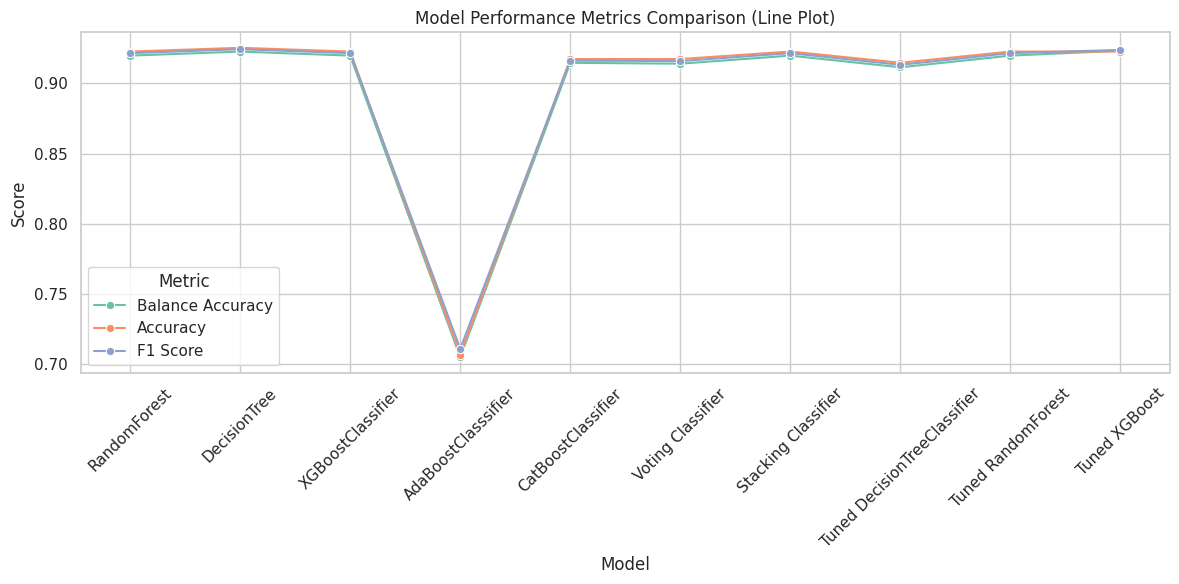

In [51]:
models_melted = pd.melt(model_metrics_df, id_vars='Name', value_vars=['Balance Accuracy', 'Accuracy', 'F1 Score'],
                        var_name='Metric', value_name='Score')

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(x='Name', y='Score', hue='Metric', data=models_melted, marker='o', palette='Set2')

plt.title('Model Performance Metrics Comparison (Line Plot)')
plt.ylabel('Score')
plt.xlabel('Model')

plt.xticks(rotation=45)

plt.legend(title="Metric")
plt.tight_layout()
plt.show()